In [2]:
!pip install tensorflow


In [29]:
import os
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [11]:
with tarfile.open('/content/images.tar', 'r') as tar:
    tar.extractall('/content')

In [16]:
data_dir = '/content/Images'
image_size = (128, 128)
batch_size = 32

In [17]:
import os

# Print contents of /content directory
print(os.listdir('/content/Images'))


['n02109961-Eskimo_dog', 'n02088238-basset', 'n02109525-Saint_Bernard', 'n02099267-flat-coated_retriever', 'n02093754-Border_terrier', 'n02097209-standard_schnauzer', 'n02102973-Irish_water_spaniel', 'n02096294-Australian_terrier', 'n02100236-German_short-haired_pointer', 'n02105056-groenendael', 'n02110958-pug', 'n02085936-Maltese_dog', 'n02099712-Labrador_retriever', 'n02106030-collie', 'n02095314-wire-haired_fox_terrier', 'n02086646-Blenheim_spaniel', 'n02113023-Pembroke', 'n02108915-French_bulldog', 'n02110063-malamute', 'n02088466-bloodhound', 'n02099429-curly-coated_retriever', 'n02113978-Mexican_hairless', 'n02090721-Irish_wolfhound', 'n02105505-komondor', 'n02096177-cairn', 'n02086910-papillon', 'n02089867-Walker_hound', 'n02107683-Bernese_mountain_dog', 'n02108422-bull_mastiff', 'n02090379-redbone', 'n02100583-vizsla', 'n02113712-miniature_poodle', 'n02086240-Shih-Tzu', 'n02112018-Pomeranian', 'n02090622-borzoi', 'n02107312-miniature_pinscher', 'n02091032-Italian_greyhound', '

In [22]:
num_classes = len(os.listdir(data_dir))

In [18]:
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Split data into 80% train and 20% validation
)

In [19]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

Found 16508 images belonging to 120 classes.


In [20]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 4072 images belonging to 120 classes.


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)


Epoch 1/10
516/516 [==============================] - 538s 1s/step - loss: 4.6916 - accuracy: 0.0188 - val_loss: 4.4685 - val_accuracy: 0.0368
Epoch 2/10
516/516 [==============================] - 547s 1s/step - loss: 4.2559 - accuracy: 0.0566 - val_loss: 4.1706 - val_accuracy: 0.0631
Epoch 3/10
516/516 [==============================] - 537s 1s/step - loss: 3.9449 - accuracy: 0.1010 - val_loss: 4.0563 - val_accuracy: 0.0931
Epoch 4/10
516/516 [==============================] - 545s 1s/step - loss: 3.6270 - accuracy: 0.1485 - val_loss: 4.0431 - val_accuracy: 0.1009
Epoch 5/10
516/516 [==============================] - 536s 1s/step - loss: 3.2515 - accuracy: 0.2176 - val_loss: 4.1753 - val_accuracy: 0.1036
Epoch 6/10
516/516 [==============================] - 536s 1s/step - loss: 2.7682 - accuracy: 0.3102 - val_loss: 4.3149 - val_accuracy: 0.1139
Epoch 7/10
516/516 [==============================] - 536s 1s/step - loss: 2.1641 - accuracy: 0.4385 - val_loss: 5.0240 - val_accuracy: 0.1073

In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

128/128 [==============================] - 44s 344ms/step - loss: 8.5315 - accuracy: 0.0864
Test accuracy: 0.08644400537014008


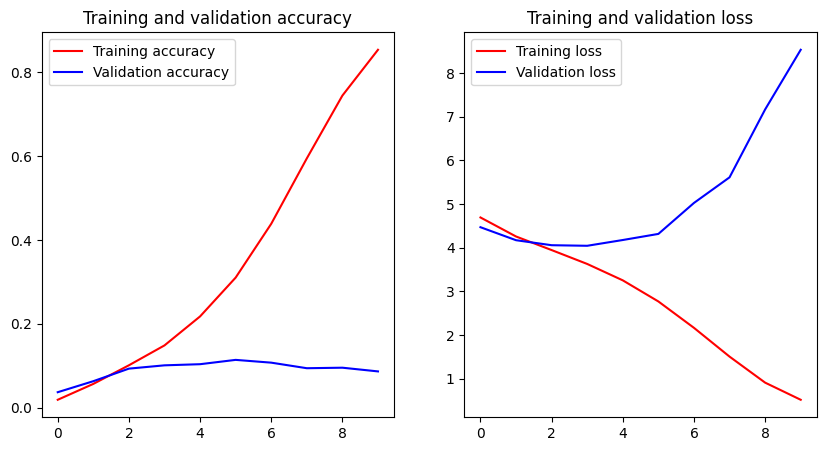

In [28]:
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset for testing
)

Found 4072 images belonging to 120 classes.


In [32]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

128/128 [==============================] - 46s 345ms/step


In [34]:
# Calculate evaluation metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.08644400785854617
Precision: 0.09582285575894478
Recall: 0.08644400785854617
F1-score: 0.08635313808368876


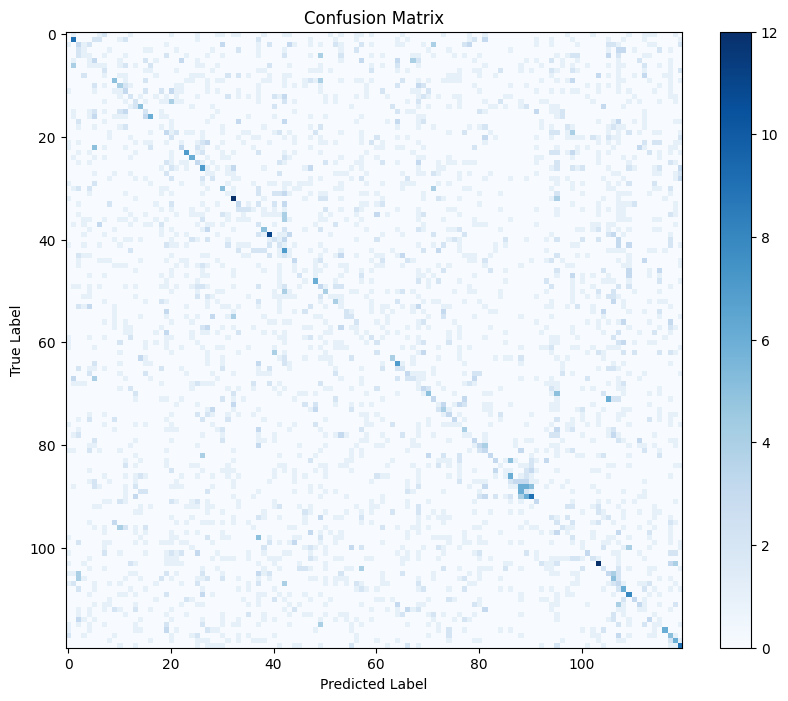

In [35]:
# Visualize confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()